In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install diffusers torchsde kornia spandrel lpips black timm addict yapf rembg fastapi asyncio uvicorn nest_asyncio pyngrok python-multipart

In [2]:
import os
import random
import sys
from typing import Sequence, Mapping, Any, Union
import torch
import numpy
from  PIL import Image
import gc

sys.path.append("/content/drive/MyDrive/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master")

from nodes import NODE_CLASS_MAPPINGS

ModuleNotFoundError: No module named 'torchsde'

In [ ]:
# @title Function
def get_value_at_index(obj: Union[Sequence, Mapping], index: int) -> Any:
    try:
        return obj[index]
    except KeyError:
        return obj["result"][index]


def find_path(name: str, path: str = None) -> str:
    # If no path is given, use the current working directory
    if path is None:
        path = os.getcwd()

    # Check if the current directory contains the name
    if name in os.listdir(path):
        path_name = os.path.join(path, name)
        print(f"{name} found: {path_name}")
        return path_name

    # Get the parent directory
    parent_directory = os.path.dirname(path)

    # If the parent directory is the same as the current directory, we've reached the root and stop the search
    if parent_directory == path:
        return None

    # Recursively call the function with the parent directory
    return find_path(name, parent_directory)


def add_comfyui_directory_to_sys_path() -> None:
    comfyui_path = find_path("ComfyUI")
    if comfyui_path is not None and os.path.isdir(comfyui_path):
        sys.path.append(comfyui_path)
        print(f"'{comfyui_path}' added to sys.path")


def add_extra_model_paths() -> None:
    try:
        from main import load_extra_path_config
    except ImportError:
        print(
            "Could not import load_extra_path_config from main.py. Looking in utils.extra_config instead."
        )
        from utils.extra_config import load_extra_path_config

    extra_model_paths = find_path("extra_model_paths.yaml")

    if extra_model_paths is not None:
        load_extra_path_config(extra_model_paths)
    else:
        print("Could not find the extra_model_paths config file.")

def import_custom_nodes() -> None:
    import asyncio
    import execution
    from nodes import init_extra_nodes
    import server

    # Creating a new event loop and setting it as the default loop
    loop = asyncio.new_event_loop()
    asyncio.set_event_loop(loop)

    # Creating an instance of PromptServer with the loop
    server_instance = server.PromptServer(loop)
    execution.PromptQueue(server_instance)

    # Initializing custom nodes
    init_extra_nodes()


add_comfyui_directory_to_sys_path()
add_extra_model_paths()
import_custom_nodes()

INFO:root:[Prompt Server] web root: /content/drive/MyDrive/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/web
[Prompt Server] web root: /content/drive/MyDrive/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/web


Could not find the extra_model_paths config file.


/usr/local/lib/python3.10/dist-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


------------------------------------------
Comfyroll Studio v1.76 :  175 Nodes Loaded
------------------------------------------
** For changes, please see patch notes at https://github.com/Suzie1/ComfyUI_Comfyroll_CustomNodes/blob/main/Patch_Notes.md
** For help, please see the wiki at https://github.com/Suzie1/ComfyUI_Comfyroll_CustomNodes/wiki
------------------------------------------
### Loading: ComfyUI-Impact-Pack (V7.5.2)
### Loading: ComfyUI-Impact-Pack (Subpack: V0.7)
[WARN] ComfyUI-Impact-Pack: `ComfyUI` or `ComfyUI-Manager` is an outdated version.
[Impact Pack] Wildcards loading done.


[comfyui_controlnet_aux] | INFO -> Using ckpts path: /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/comfyui_controlnet_aux/ckpts
[comfyui_controlnet_aux] | INFO -> Using symlinks: False
[comfyui_controlnet_aux] | INFO -> Using ort providers: ['CUDAExecutionProvider', 'DirectMLExecutionProvider', 'OpenVINOExecutionProvider', 'ROCMExecutionProvider', 'CPUExecutionProvider', 'CoreMLExecutionProvider']
/content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/comfyui_controlnet_aux/node_wrappers/dwpose.py:26: UserWarning: DWPose: Onnxruntime not found or doesn't come with acceleration providers, switch to OpenCV with CPU device. DWPose might run very slowly
  warnings.warn("DWPose: Onnxruntime not found or doesn't come with acceleration providers, switch to OpenCV with CPU device. DWPose might run very slowly")


[Allor]: 0 nodes were overridden.
[Allor]: 12 modules were enabled.
[Allor]: 98 nodes were loaded.


INFO:root:
Import times for custom nodes:

Import times for custom nodes:
INFO:root:   0.0 seconds: /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/websocket_image_save.py
   0.0 seconds: /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/websocket_image_save.py
INFO:root:   0.0 seconds: /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/ComfyUI-FatLabels
   0.0 seconds: /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/ComfyUI-FatLabels
INFO:root:   0.0 seconds: /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/cg-use-everywhere
   0.0 seconds: /content/driv

In [ ]:
# @title Loading Resources
vaeloader = NODE_CLASS_MAPPINGS["VAELoader"]()
checkpointloadersimple = NODE_CLASS_MAPPINGS["CheckpointLoaderSimple"]()
cliptextencode = NODE_CLASS_MAPPINGS["CLIPTextEncode"]()
loadimage = NODE_CLASS_MAPPINGS["LoadImage"]()
controlnetloader = NODE_CLASS_MAPPINGS["ControlNetLoader"]()
ipadaptermodelloader = NODE_CLASS_MAPPINGS["IPAdapterModelLoader"]()
clipvisionloader = NODE_CLASS_MAPPINGS["CLIPVisionLoader"]()
samloader = NODE_CLASS_MAPPINGS["SAMLoader"]()
ultralyticsdetectorprovider = NODE_CLASS_MAPPINGS["UltralyticsDetectorProvider"]()
groundingdinomodelloader_segment_anything = NODE_CLASS_MAPPINGS["GroundingDinoModelLoader (segment anything)"]()
groundingdinosamsegment_segment_anything = NODE_CLASS_MAPPINGS["GroundingDinoSAMSegment (segment anything)"]()
imagescaletototalpixels = NODE_CLASS_MAPPINGS["ImageScaleToTotalPixels"]()
getimagesize = NODE_CLASS_MAPPINGS["GetImageSize"]()
emptylatentimage = NODE_CLASS_MAPPINGS["EmptyLatentImage"]()
prepimageforclipvision = NODE_CLASS_MAPPINGS["PrepImageForClipVision"]()
ipadapteradvanced = NODE_CLASS_MAPPINGS["IPAdapterAdvanced"]()
freeu_v2 = NODE_CLASS_MAPPINGS["FreeU_V2"]()
# dwpreprocessor = NODE_CLASS_MAPPINGS["DWPreprocessor"]()
controlnetapplyadvanced = NODE_CLASS_MAPPINGS["ControlNetApplyAdvanced"]()
cr_model_input_switch = NODE_CLASS_MAPPINGS["CR Model Input Switch"]()
ksampleradvanced = NODE_CLASS_MAPPINGS["KSamplerAdvanced"]()
nnlatentupscale = NODE_CLASS_MAPPINGS["NNLatentUpscale"]()
ksampler = NODE_CLASS_MAPPINGS["KSampler"]()
vaedecode = NODE_CLASS_MAPPINGS["VAEDecode"]()
bboxdetectorsegs = NODE_CLASS_MAPPINGS["BboxDetectorSEGS"]()
samdetectorcombined = NODE_CLASS_MAPPINGS["SAMDetectorCombined"]()
impactsegsandmask = NODE_CLASS_MAPPINGS["ImpactSegsAndMask"]()
conditioningcombine = NODE_CLASS_MAPPINGS["ConditioningCombine"]()
detailerforeachdebug = NODE_CLASS_MAPPINGS["DetailerForEachDebug"]()
saveimage = NODE_CLASS_MAPPINGS["SaveImage"]()
catvtonwrapper = NODE_CLASS_MAPPINGS["CatVTONWrapper"]()

vaeloader_8 = vaeloader.load_vae(vae_name="vae-ft-mse-840000-ema-pruned.safetensors")
checkpointloadersimple_16 = checkpointloadersimple.load_checkpoint(ckpt_name="realdream.safetensors")
controlnetloader_156 = controlnetloader.load_controlnet(control_net_name="control_v11p_sd15_openpose.pth")
ipadaptermodelloader_256 = ipadaptermodelloader.load_ipadapter_model(ipadapter_file="ip-adapter-full-face_sd15.safetensors")
clipvisionloader_257 = clipvisionloader.load_clip(clip_name="model.safetensors")
ultralyticsdetectorprovider_266 = ultralyticsdetectorprovider.doit(model_name="bbox/face_yolov8m.pt")
samloader_268 = samloader.load_model(model_name="sam_vit_b_01ec64.pth", device_mode="Prefer GPU")
cliptextencode_274 = cliptextencode.encode(text="a face", clip=get_value_at_index(checkpointloadersimple_16, 1))
groundingdinomodelloader_segment_anything_306 = (groundingdinomodelloader_segment_anything.main(model_name="GroundingDINO_SwinT_OGC (694MB)"))
samloader_307 = samloader.load_model(model_name="sam_vit_b_01ec64.pth", device_mode="Prefer GPU")

sys.path.append("/content/drive/MyDrive/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/comfyui_controlnet_aux/src")
from custom_controlnet_aux.dwpose import DwposeDetector, AnimalposeDetector
sys.path.append("/content/drive/MyDrive/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master")
import comfy.model_management as model_management

sys.path.append("/content/drive/MyDrive/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/comfyui_controlnet_aux")
from comfyui_controlnet_aux.utils import common_annotator_call, define_preprocessor_inputs, INPUT
import json

bbox_detector="yolox_l.onnx"
pose_estimator="dw-ll_ucoco_384.onnx"
yolo_repo="yzd-v/DWPose"
pose_repo="yzd-v/DWPose"
DWPOSE_MODEL_NAME = "yzd-v/DWPose"

model = DwposeDetector.from_pretrained(
        pose_repo,
        yolo_repo,
        det_filename=bbox_detector, pose_filename=pose_estimator,
        torchscript_device=model_management.get_torch_device()
    )

class DWPose_Preprocessor:
    @classmethod
    def INPUT_TYPES(s):
        return define_preprocessor_inputs(
            detect_hand=INPUT.COMBO(["enable", "disable"]),
            detect_body=INPUT.COMBO(["enable", "disable"]),
            detect_face=INPUT.COMBO(["enable", "disable"]),
            resolution=INPUT.RESOLUTION(),
            bbox_detector=INPUT.COMBO(
                ["yolox_l.torchscript.pt", "yolox_l.onnx", "yolo_nas_l_fp16.onnx", "yolo_nas_m_fp16.onnx", "yolo_nas_s_fp16.onnx"],
                default="yolox_l.onnx"
            ),
            pose_estimator=INPUT.COMBO(
                ["dw-ll_ucoco_384_bs5.torchscript.pt", "dw-ll_ucoco_384.onnx", "dw-ll_ucoco.onnx"],
                default="dw-ll_ucoco_384_bs5.torchscript.pt"
            ),
            scale_stick_for_xinsr_cn=INPUT.COMBO(["disable", "enable"])
        )

    RETURN_TYPES = ("IMAGE", "POSE_KEYPOINT")
    FUNCTION = "estimate_pose"

    CATEGORY = "ControlNet Preprocessors/Faces and Poses Estimators"

    def estimate_pose(self, image, detect_hand="enable", detect_body="enable", detect_face="enable", resolution=512, model=None, scale_stick_for_xinsr_cn="disable", **kwargs):
        detect_hand = detect_hand == "enable"
        detect_body = detect_body == "enable"
        detect_face = detect_face == "enable"
        scale_stick_for_xinsr_cn = scale_stick_for_xinsr_cn == "enable"
        self.openpose_dicts = []
        def func(image, **kwargs):
            pose_img, openpose_dict = model(image, **kwargs)
            self.openpose_dicts.append(openpose_dict)
            return pose_img

        out = common_annotator_call(func, image, include_hand=detect_hand, include_face=detect_face, include_body=detect_body, image_and_json=True, resolution=resolution, xinsr_stick_scaling=scale_stick_for_xinsr_cn)
        del model
        return {
            'ui': { "openpose_json": [json.dumps(self.openpose_dicts, indent=4)] },
            "result": (out, self.openpose_dicts)
        }

dwpreprocessor = DWPose_Preprocessor()

INFO:root:Using pytorch attention in VAE
Using pytorch attention in VAE
INFO:root:Using pytorch attention in VAE
Using pytorch attention in VAE
INFO:root:model weight dtype torch.float16, manual cast: None
model weight dtype torch.float16, manual cast: None
INFO:root:model_type EPS
model_type EPS
INFO:root:Using pytorch attention in VAE
Using pytorch attention in VAE
INFO:root:Using pytorch attention in VAE
Using pytorch attention in VAE
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
INFO:root:loaded straight to GPU
loaded straight to GPU
INFO:root:Requested to load BaseModel
Requested to load BaseModel
INFO:root:Loading 1 new model
Loading 1 new mo

Loads SAM model: /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/models/sams/sam_vit_b_01ec64.pth (device:Prefer GPU)


/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/comfyui_segment_anything/node.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any

Loads SAM model: /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/models/sams/sam_vit_b_01ec64.pth (device:Prefer GPU)
model_path is /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/comfyui_controlnet_aux/ckpts/yzd-v/DWPose/yolox_l.onnx
model_path is /content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/comfyui_controlnet_aux/ckpts/yzd-v/DWPose/dw-ll_ucoco_384.onnx

DWPose: Using yolox_l.onnx for bbox detection and dw-ll_ucoco_384.onnx for pose estimation
DWPose: Caching OpenCV DNN module yolox_l.onnx on cv2.DNN...
DWPose: Caching OpenCV DNN module dw-ll_ucoco_384.onnx on cv2.DNN...


In [ ]:
face = "face4.png"
pose = "clothes1.jpg"
clothes = "clothes2.jpg"

prompt = "A beautiful woman wearing clothes, 8k uhd, dslr, soft lighting, high quality, film grain"
negative_prompt = "naked, nsfw, drab, colourless, low-quality,blurred,jpeg artifacts,cropped image,out of shot,cartoon,cg,comic,drawing,bad art,bad artist,bad fan art,CGI,grainy,kitsch,lazy art,less creative,lowres,noise,bad composition,mutated body parts,blurry image,disfigured,bad anatomy,deformed body features,double head,double figure,double body,extra fingers,mutated hands,poorly drawn hands,mutation,deformed,dehydrated,bad proportions,extra limbs,cloned face,gross proportions,malformed limbs,missing arms,missing legs,extra arms,extra legs,fused fingers,too many fingers,long neck,disconnected head,malformed hands,huge calf,fused hand,disappearing arms,disappearing thigh,disappearing calf,disappearing legs,abnormal eye proportion,Abnormal legs,abnormal feet,abnormal fingers,painting,crayon,graphite,deformed,mutated,mutation,long body,bad body,fused fingers,missing fingers,bad hands,disfigured,too many fingers,logo,text,watermark."
replace_prompt = "clothes"

In [ ]:
# @title Old inference
# def inference_code():
#     with torch.inference_mode():
#         cliptextencode_18 = cliptextencode.encode(text=negative_prompt,clip=get_value_at_index(checkpointloadersimple_16, 1),)
#         cliptextencode_30 = cliptextencode.encode(text=prompt, clip=get_value_at_index(checkpointloadersimple_16, 1))
#         loadimage_155 = loadimage.load_image(image=f"{pose}")
#         loadimage_161 = loadimage.load_image(image=f"{face}")
#         loadimage_304 = loadimage.load_image(image=f"{clothes}")
#         for q in range(1):
#             imagescaletototalpixels_168 = imagescaletototalpixels.upscale(upscale_method="nearest-exact",megapixels=0.5,image=get_value_at_index(loadimage_155, 0),)
#             getimagesize_208 = getimagesize.get_size(image=get_value_at_index(imagescaletototalpixels_168, 0))
#             emptylatentimage_21 = emptylatentimage.generate(width=get_value_at_index(getimagesize_208, 0),height=get_value_at_index(getimagesize_208, 1),batch_size=1,)
#             prepimageforclipvision_259 = prepimageforclipvision .prep_image(interpolation="LANCZOS",crop_position="center",sharpening=0,image=get_value_at_index(loadimage_161, 0),)
#             ipadapteradvanced_303 = ipadapteradvanced.apply_ipadapter(weight=1,weight_type="linear",combine_embeds="concat",start_at=0,end_at=1,embeds_scaling="V only",model=get_value_at_index(checkpointloadersimple_16, 0),ipadapter=get_value_at_index(ipadaptermodelloader_256, 0),image=get_value_at_index(prepimageforclipvision_259, 0),clip_vision=get_value_at_index(clipvisionloader_257, 0),)
#             freeu_v2_252 = freeu_v2.patch(b1=1.3,b2=1.4,s1=0.9,s2=0.2,model=get_value_at_index(ipadapteradvanced_303, 0),)
#             dwpreprocessor_238 = dwpreprocessor.estimate_pose(detect_hand="enable",detect_body="enable",detect_face="enable",resolution=512, model=model,scale_stick_for_xinsr_cn="disable",image=get_value_at_index(imagescaletototalpixels_168, 0),)
#             controlnetapplyadvanced_240 = controlnetapplyadvanced.apply_controlnet(strength=1,start_percent=0,end_percent=1,positive=get_value_at_index(cliptextencode_30, 0),negative=get_value_at_index(cliptextencode_18, 0),control_net=get_value_at_index(controlnetloader_156, 0),image=get_value_at_index(dwpreprocessor_238, 0),)
#             cr_model_input_switch_291 = cr_model_input_switch.switch(Input=2,model1=get_value_at_index(checkpointloadersimple_16, 0),model2=get_value_at_index(freeu_v2_252, 0),)
#             ksampleradvanced_253 = ksampleradvanced.sample(add_noise="enable",noise_seed=random.randint(1, 2**64),steps=20,cfg=5.5,sampler_name="heunpp2",scheduler="karras",start_at_step=0,end_at_step=10000,return_with_leftover_noise="disable",model=get_value_at_index(cr_model_input_switch_291, 0),positive=get_value_at_index(controlnetapplyadvanced_240, 0),negative=get_value_at_index(controlnetapplyadvanced_240, 1),latent_image=get_value_at_index(emptylatentimage_21, 0),)
#             nnlatentupscale_263 = nnlatentupscale.upscale(version="SD 1.x",upscale=1.5,latent=get_value_at_index(ksampleradvanced_253, 0),)
#             ksampler_176 = ksampler.sample(seed=random.randint(1, 2**64),steps=16,cfg=5.6000000000000005,sampler_name="uni_pc",scheduler="karras",denoise=0.25,model=get_value_at_index(freeu_v2_252, 0),positive=get_value_at_index(controlnetapplyadvanced_240, 0),negative=get_value_at_index(controlnetapplyadvanced_240, 1),latent_image=get_value_at_index(nnlatentupscale_263, 0),)
#             nnlatentupscale_298 = nnlatentupscale.upscale(version="SD 1.x",upscale=1.5,latent=get_value_at_index(ksampler_176, 0),)
#             ksampler_297 = ksampler.sample(seed=random.randint(1, 2**64),steps=14,cfg=5.5,sampler_name="dpmpp_2m",scheduler="karras",denoise=0.35000000000000003,model=get_value_at_index(freeu_v2_252, 0),positive=get_value_at_index(controlnetapplyadvanced_240, 0),negative=get_value_at_index(controlnetapplyadvanced_240, 1),latent_image=get_value_at_index(nnlatentupscale_298, 0),)
#             vaedecode_301 = vaedecode.decode(samples=get_value_at_index(ksampler_297, 0),vae=get_value_at_index(vaeloader_8, 0),)
#             bboxdetectorsegs_267 = bboxdetectorsegs.doit(threshold=0.52,dilation=10,crop_factor=1.2000000000000002,drop_size=10,labels="all",bbox_detector=get_value_at_index(ultralyticsdetectorprovider_266, 0),image=get_value_at_index(vaedecode_301, 0),)
#             samdetectorcombined_269 = samdetectorcombined.doit(detection_hint="mask-points",dilation=0,threshold=0.9400000000000001,bbox_expansion=0,mask_hint_threshold=0.7,mask_hint_use_negative="False",sam_model=get_value_at_index(samloader_268, 0),segs=get_value_at_index(bboxdetectorsegs_267, 0),image=get_value_at_index(vaedecode_301, 0),)
#             impactsegsandmask_278 = impactsegsandmask.doit(segs=get_value_at_index(bboxdetectorsegs_267, 0),mask=get_value_at_index(samdetectorcombined_269, 0),)
#             conditioningcombine_275 = conditioningcombine.combine(conditioning_1=get_value_at_index(cliptextencode_274, 0),conditioning_2=get_value_at_index(controlnetapplyadvanced_240, 0),)
#             detailerforeachdebug_270 = detailerforeachdebug.doit(guide_size=1024,guide_size_for=False,max_size=1024,seed=random.randint(1, 2**64),steps=16,cfg=8.5,sampler_name="ddpm",scheduler="karras",denoise=0.3,feather=6,noise_mask=True,force_inpaint=True,wildcard="",cycle=1,inpaint_model=False,noise_mask_feather=20,image=get_value_at_index(vaedecode_301, 0),segs=get_value_at_index(impactsegsandmask_278, 0),model=get_value_at_index(checkpointloadersimple_16, 0),clip=get_value_at_index(checkpointloadersimple_16, 1),vae=get_value_at_index(vaeloader_8, 0),positive=get_value_at_index(conditioningcombine_275, 0),negative=get_value_at_index(controlnetapplyadvanced_240, 1),)

#             # Change Clothes
#             groundingdinosamsegment_segment_anything_305 = (groundingdinosamsegment_segment_anything.main(prompt=f"{replace_prompt}",threshold=0.3,sam_model=get_value_at_index(samloader_307, 0),grounding_dino_model=get_value_at_index(groundingdinomodelloader_segment_anything_306, 0),image=get_value_at_index(detailerforeachdebug_270, 0),))
#             catvtonwrapper_308 = catvtonwrapper.catvton(mask_grow=25,mixed_precision="fp16",seed=random.randint(1, 2**64),steps=40,cfg=2.5,image=get_value_at_index(detailerforeachdebug_270, 0),mask=get_value_at_index(groundingdinosamsegment_segment_anything_305, 1),refer_image=get_value_at_index(loadimage_304, 0),)

#             # Save image
#             saveimage_277 = saveimage.save_images(filename_prefix="Reposer_S2_Facefix",images=get_value_at_index(detailerforeachdebug_270, 0),)
#             saveimage_309 = saveimage.save_images(filename_prefix="ChangeClothes",images=get_value_at_index(catvtonwrapper_308, 0),)

#             return get_value_at_index(catvtonwrapper_308, 0)

In [ ]:
# @title Inference Code
# def inference_code():
#     # Enter inference mode (turns off gradient calculations for memory optimization)
#     with torch.inference_mode():

#         # Encode the negative prompt text into CLIP text embeddings
#         # This is used to suppress unwanted features in the final image
#         cliptextencode_18 = cliptextencode.encode(
#             text=negative_prompt,  # The negative text prompt (what should be avoided in the image)
#             clip=get_value_at_index(checkpointloadersimple_16, 1),  # Load the CLIP text encoder from the checkpoint
#         )

#         # Encode the positive prompt text into CLIP text embeddings
#         # This encourages the model to include features described by the positive prompt
#         cliptextencode_30 = cliptextencode.encode(
#             text=prompt,  # The positive text prompt (what should be included in the image)
#             clip=get_value_at_index(checkpointloadersimple_16, 1),  # Load the CLIP text encoder from the checkpoint
#         )

#         # Load the pose image (which may provide body positioning) from the specified path
#         loadimage_155 = loadimage.load_image(image=f"{pose}")

#         # Load the face image, used to condition the generation on specific facial features
#         loadimage_161 = loadimage.load_image(image=f"{face}")

#         # Load the clothes image, which may represent the outfit to be worn by the subject
#         loadimage_304 = loadimage.load_image(image=f"{clothes}")

#         # Loop over the number of iterations (currently set to 1 iteration, meaning no real loop here)
#         for q in range(1):

#             # Upscale the pose image to a total size of 0.5 megapixels using nearest neighbor scaling
#             # This step adjusts the image resolution for further processing
#             imagescaletototalpixels_168 = imagescaletototalpixels.upscale(
#                 upscale_method="nearest-exact",  # Use nearest-neighbor scaling for the image
#                 megapixels=0.5,  # Set target resolution to 0.5 megapixels
#                 image=get_value_at_index(loadimage_155, 0),  # Load the first item from the pose image batch
#             )

#             # Get the size (width, height) of the upscaled pose image for further use
#             getimagesize_208 = getimagesize.get_size(
#                 image=get_value_at_index(imagescaletototalpixels_168, 0)  # Use the upscaled pose image
#             )

#             # Generate an empty latent image with the same dimensions as the upscaled image
#             # The latent image acts as a placeholder for generating the new image in latent space
#             emptylatentimage_21 = emptylatentimage.generate(
#                 width=get_value_at_index(getimagesize_208, 0),  # Use the width of the upscaled image
#                 height=get_value_at_index(getimagesize_208, 1),  # Use the height of the upscaled image
#                 batch_size=1,  # Generate a single latent image
#             )

#             # Prepare the face image for use with CLIP Vision by resizing and sharpening it
#             # This step ensures the face image is compatible with the model’s expectations
#             prepimageforclipvision_259 = prepimageforclipvision.prep_image(
#                 interpolation="LANCZOS",  # Use Lanczos interpolation for resizing (high-quality method)
#                 crop_position="center",  # Center the crop around the face
#                 sharpening=0,  # No additional sharpening is applied
#                 image=get_value_at_index(loadimage_161, 0),  # Load the first face image
#             )

#             # Apply the IP-Adapter model to the prepared face image
#             # The IP-Adapter adapts the input image by fusing visual and textual embeddings
#             ipadapteradvanced_303 = ipadapteradvanced.apply_ipadapter(
#                 weight=1,  # Weight for the adaptation process (how strongly to apply this transformation)
#                 weight_type="linear",  # Use a linear weighting scheme
#                 combine_embeds="concat",  # Combine the embeddings by concatenation (text and image)
#                 start_at=0,  # Start adapting from the first layer of the model
#                 end_at=1,  # End adapting after one layer
#                 embeds_scaling="V only",  # Only scale the embeddings from the Vision model (CLIP Vision)
#                 model=get_value_at_index(checkpointloadersimple_16, 0),  # Main generation model (from the checkpoint)
#                 ipadapter=get_value_at_index(ipadaptermodelloader_256, 0),  # IP-Adapter model
#                 image=get_value_at_index(prepimageforclipvision_259, 0),  # The prepared face image
#                 clip_vision=get_value_at_index(clipvisionloader_257, 0),  # The CLIP Vision model
#             )

#             # Apply the FreeU-V2 model, which enhances the image using patch-based processing
#             # This model applies transformations to specific parts of the image (patches) for refinement
#             freeu_v2_252 = freeu_v2.patch(
#                 b1=1.3,  # Parameter controlling some aspect of patch processing
#                 b2=1.4,  # Another parameter for patch processing
#                 s1=0.9,  # Scaling factor for patches
#                 s2=0.2,  # Scaling factor for another stage of the patch process
#                 model=get_value_at_index(ipadapteradvanced_303, 0),  # Apply FreeU-V2 on the adapted model output
#             )

#             # Estimate the human pose (body, face, hands) from the upscaled pose image
#             # This provides key points for the body and helps condition the image generation process
#             dwpreprocessor_238 = dwpreprocessor.estimate_pose(
#                 detect_hand="enable",  # Enable detection of hand key points
#                 detect_body="enable",  # Enable detection of body key points
#                 detect_face="enable",  # Enable detection of face key points
#                 resolution=512,  # Set resolution for pose detection
#                 model=model,  # Use the provided model for pose estimation
#                 scale_stick_for_xinsr_cn="disable",  # Disable scaling for stick figure models
#                 image=get_value_at_index(imagescaletototalpixels_168, 0),  # The upscaled pose image
#             )

#             # Apply ControlNet for advanced conditioning of the image
#             controlnetapplyadvanced_240 = controlnetapplyadvanced.apply_controlnet(
#                 strength=1, start_percent=0, end_percent=1,
#                 positive=get_value_at_index(cliptextencode_30, 0),
#                 negative=get_value_at_index(cliptextencode_18, 0),
#                 control_net=get_value_at_index(controlnetloader_156, 0),
#                 image=get_value_at_index(dwpreprocessor_238, 0)
#             )

#             # Switch between two models for further image processing
#             cr_model_input_switch_291 = cr_model_input_switch.switch(
#                 Input=2,  # Model 2 is selected
#                 model1=get_value_at_index(checkpointloadersimple_16, 0),
#                 model2=get_value_at_index(freeu_v2_252, 0)
#             )

#             # Perform image sampling with advanced settings, applying noise and steps configuration
#             ksampleradvanced_253 = ksampleradvanced.sample(
#                 add_noise="enable", noise_seed=random.randint(1, 2**64), steps=20, cfg=5.5,
#                 sampler_name="heunpp2", scheduler="karras", start_at_step=0, end_at_step=10000,
#                 return_with_leftover_noise="disable", model=get_value_at_index(cr_model_input_switch_291, 0),
#                 positive=get_value_at_index(controlnetapplyadvanced_240, 0),
#                 negative=get_value_at_index(controlnetapplyadvanced_240, 1),
#                 latent_image=get_value_at_index(emptylatentimage_21, 0)
#             )

#             # Upscale the latent image using a neural network-based latent space upscaling
#             nnlatentupscale_263 = nnlatentupscale.upscale(
#                 version="SD 1.x", upscale=1.5, latent=get_value_at_index(ksampleradvanced_253, 0)
#             )

#             # Perform image sampling again with different settings, using "uni_pc" sampler
#             ksampler_176 = ksampler.sample(
#                 seed=random.randint(1, 2**64), steps=16, cfg=5.6,
#                 sampler_name="uni_pc", scheduler="karras", denoise=0.25,
#                 model=get_value_at_index(freeu_v2_252, 0),
#                 positive=get_value_at_index(controlnetapplyadvanced_240, 0),
#                 negative=get_value_at_index(controlnetapplyadvanced_240, 1),
#                 latent_image=get_value_at_index(nnlatentupscale_263, 0)
#             )

#             # Upscale the latent image again for better resolution
#             nnlatentupscale_298 = nnlatentupscale.upscale(
#                 version="SD 1.x", upscale=1.5, latent=get_value_at_index(ksampler_176, 0)
#             )

#             # Final sampling with DPM++ 2M sampler, which adds additional refinement to the image
#             ksampler_297 = ksampler.sample(
#                 seed=random.randint(1, 2**64), steps=14, cfg=5.5,
#                 sampler_name="dpmpp_2m", scheduler="karras", denoise=0.35,
#                 model=get_value_at_index(freeu_v2_252, 0),
#                 positive=get_value_at_index(controlnetapplyadvanced_240, 0),
#                 negative=get_value_at_index(controlnetapplyadvanced_240, 1),
#                 latent_image=get_value_at_index(nnlatentupscale_298, 0)
#             )

#             # Decode the final latent representation into an actual image using VAE
#             vaedecode_301 = vaedecode.decode(
#                 samples=get_value_at_index(ksampler_297, 0),
#                 vae=get_value_at_index(vaeloader_8, 0)
#             )

#             # Detect bounding boxes in the decoded image for further segmentation using a threshold and dilation
#             bboxdetectorsegs_267 = bboxdetectorsegs.doit(
#                 threshold=0.52, dilation=10, crop_factor=1.2, drop_size=10, labels="all",
#                 bbox_detector=get_value_at_index(ultralyticsdetectorprovider_266, 0),
#                 image=get_value_at_index(vaedecode_301, 0)
#             )

#             # Use SAM model to generate detailed segmentations based on detected bounding boxes and masks
#             samdetectorcombined_269 = samdetectorcombined.doit(
#                 detection_hint="mask-points", dilation=0, threshold=0.94, bbox_expansion=0,
#                 mask_hint_threshold=0.7, mask_hint_use_negative="False",
#                 sam_model=get_value_at_index(samloader_268, 0),
#                 segs=get_value_at_index(bboxdetectorsegs_267, 0),
#                 image=get_value_at_index(vaedecode_301, 0)
#             )

#             # Combine the detected bounding boxes and mask to create impact segments for the next steps
#             impactsegsandmask_278 = impactsegsandmask.doit(
#                 segs=get_value_at_index(bboxdetectorsegs_267, 0),
#                 mask=get_value_at_index(samdetectorcombined_269, 0)
#             )

#             # Combine different conditioning inputs (from text and ControlNet) for further fine-tuning
#             conditioningcombine_275 = conditioningcombine.combine(
#                 conditioning_1=get_value_at_index(cliptextencode_274, 0),
#                 conditioning_2=get_value_at_index(controlnetapplyadvanced_240, 0)
#             )

#             # # Apply additional refinement to the generated image by using a debug detailer, applying noise, and inpainting
#             # detailerforeachdebug_270 = detailerforeachdebug.doit(
#             #     guide_size=1024, guide_size_for=False, max_size=1024, seed=random.randint(1, 2**64),
#             #     steps=16, cfg=8.5, sampler_name="ddpm", scheduler="karras", denoise=0.3,
#             #     feather=6, noise_mask=True, force_inpaint=True, wildcard="", cycle=1,
#             #     inpaint_model=False, noise_mask_feather=20,
#             #     image=get_value_at_index(vaedecode_301, 0),
#             #     segs=get_value_at_index(impactsegsandmask_278, 0),
#             #     model=get_value_at_index(checkpointloadersimple_16, 0),
#             #     clip=get_value_at_index(checkpointloadersimple_16, 1),
#             #     vae=get_value_at_index(vaeloader_8, 0),
#             #     positive=get_value_at_index(conditioningcombine_275, 0),
#             #     negative=get_value_at_index(controlnetapplyadvanced_240, 1)
#             # )

#             # Change Clothes Operation
#             # Using Grounding DINO and SAM to segment specific areas based on a prompt and apply new clothes
#             groundingdinosamsegment_segment_anything_305 = groundingdinosamsegment_segment_anything.main(
#                 prompt=f"{replace_prompt}", threshold=0.3,
#                 sam_model=get_value_at_index(samloader_307, 0),
#                 grounding_dino_model=get_value_at_index(groundingdinomodelloader_segment_anything_306, 0),
#                 image=get_value_at_index(detailerforeachdebug_270, 0)
#             )

#             # Use CAT-VTON to change the clothes based on the detected segmentation mask and a reference image
#             catvtonwrapper_308 = catvtonwrapper.catvton(
#                 mask_grow=25, mixed_precision="fp16", seed=random.randint(1, 2**64), steps=40, cfg=2.5,
#                 image=get_value_at_index(detailerforeachdebug_270, 0),
#                 mask=get_value_at_index(groundingdinosamsegment_segment_anything_305, 1),
#                 refer_image=get_value_at_index(loadimage_304, 0)
#             )


#             # Save the intermediate image after the debug detailing process
#             saveimage_277 = saveimage.save_images(
#                 filename_prefix="Reposer_S2_Facefix",
#                 images=get_value_at_index(detailerforeachdebug_270, 0)
#             )


#             # Save the final image after applying the clothes change
#             saveimage_309 = saveimage.save_images(
#                 filename_prefix="ChangeClothes",
#                 images=get_value_at_index(catvtonwrapper_308, 0)
#             )

#             # Return the final result with the changed clothes
#             return get_value_at_index(catvtonwrapper_308, 0)


In [ ]:
# @title Inference Code
def inference_code():
    # Enter inference mode (turns off gradient calculations for memory optimization)
    with torch.inference_mode():

        images = None

        # Encode the negative prompt text into CLIP text embeddings
        # This is used to suppress unwanted features in the final image
        cliptextencode_18 = cliptextencode.encode(
            text=negative_prompt,  # The negative text prompt (what should be avoided in the image)
            clip=get_value_at_index(checkpointloadersimple_16, 1),  # Load the CLIP text encoder from the checkpoint
        )

        # Encode the positive prompt text into CLIP text embeddings
        # This encourages the model to include features described by the positive prompt
        cliptextencode_30 = cliptextencode.encode(
            text=prompt,  # The positive text prompt (what should be included in the image)
            clip=get_value_at_index(checkpointloadersimple_16, 1),  # Load the CLIP text encoder from the checkpoint
        )

        # Load the pose image (which may provide body positioning) from the specified path
        loadimage_155 = loadimage.load_image(image=f"{pose}")

        # Load the face image, used to condition the generation on specific facial features
        loadimage_161 = loadimage.load_image(image=f"{face}")

        # Load the clothes image, which may represent the outfit to be worn by the subject
        loadimage_304 = loadimage.load_image(image=f"{clothes}")

        # Loop over the number of iterations (currently set to 1 iteration, meaning no real loop here)
        for q in range(1):

            # Upscale the pose image to a total size of 0.5 megapixels using nearest neighbor scaling
            # This step adjusts the image resolution for further processing
            imagescaletototalpixels_168 = imagescaletototalpixels.upscale(
                upscale_method="nearest-exact",  # Use nearest-neighbor scaling for the image
                megapixels=0.5,  # Set target resolution to 0.5 megapixels
                image=get_value_at_index(loadimage_155, 0),  # Load the first item from the pose image batch
            )

            # Get the size (width, height) of the upscaled pose image for further use
            getimagesize_208 = getimagesize.get_size(
                image=get_value_at_index(imagescaletototalpixels_168, 0)  # Use the upscaled pose image
            )

            # Generate an empty latent image with the same dimensions as the upscaled image
            # The latent image acts as a placeholder for generating the new image in latent space
            emptylatentimage_21 = emptylatentimage.generate(
                width=get_value_at_index(getimagesize_208, 0),  # Use the width of the upscaled image
                height=get_value_at_index(getimagesize_208, 1),  # Use the height of the upscaled image
                batch_size=1,  # Generate a single latent image
            )

            # Prepare the face image for use with CLIP Vision by resizing and sharpening it
            # This step ensures the face image is compatible with the model’s expectations
            prepimageforclipvision_259 = prepimageforclipvision.prep_image(
                interpolation="LANCZOS",  # Use Lanczos interpolation for resizing (high-quality method)
                crop_position="center",  # Center the crop around the face
                sharpening=0,  # No additional sharpening is applied
                image=get_value_at_index(loadimage_161, 0),  # Load the first face image
            )

            # Apply the IP-Adapter model to the prepared face image
            # The IP-Adapter adapts the input image by fusing visual and textual embeddings
            ipadapteradvanced_303 = ipadapteradvanced.apply_ipadapter(
                weight=1,  # Weight for the adaptation process (how strongly to apply this transformation)
                weight_type="linear",  # Use a linear weighting scheme
                combine_embeds="concat",  # Combine the embeddings by concatenation (text and image)
                start_at=0,  # Start adapting from the first layer of the model
                end_at=1,  # End adapting after one layer
                embeds_scaling="V only",  # Only scale the embeddings from the Vision model (CLIP Vision)
                model=get_value_at_index(checkpointloadersimple_16, 0),  # Main generation model (from the checkpoint)
                ipadapter=get_value_at_index(ipadaptermodelloader_256, 0),  # IP-Adapter model
                image=get_value_at_index(prepimageforclipvision_259, 0),  # The prepared face image
                clip_vision=get_value_at_index(clipvisionloader_257, 0),  # The CLIP Vision model
            )

            # Apply the FreeU-V2 model, which enhances the image using patch-based processing
            # This model applies transformations to specific parts of the image (patches) for refinement
            freeu_v2_252 = freeu_v2.patch(
                b1=1.3,  # Parameter controlling some aspect of patch processing
                b2=1.4,  # Another parameter for patch processing
                s1=0.9,  # Scaling factor for patches
                s2=0.2,  # Scaling factor for another stage of the patch process
                model=get_value_at_index(ipadapteradvanced_303, 0),  # Apply FreeU-V2 on the adapted model output
            )

            # Estimate the human pose (body, face, hands) from the upscaled pose image
            # This provides key points for the body and helps condition the image generation process
            dwpreprocessor_238 = dwpreprocessor.estimate_pose(
                detect_hand="enable",  # Enable detection of hand key points
                detect_body="enable",  # Enable detection of body key points
                detect_face="enable",  # Enable detection of face key points
                resolution=512,  # Set resolution for pose detection
                model=model,  # Use the provided model for pose estimation
                scale_stick_for_xinsr_cn="disable",  # Disable scaling for stick figure models
                image=get_value_at_index(imagescaletototalpixels_168, 0),  # The upscaled pose image
            )

            # Apply ControlNet for advanced conditioning of the image
            controlnetapplyadvanced_240 = controlnetapplyadvanced.apply_controlnet(
                strength=1, start_percent=0, end_percent=1,
                positive=get_value_at_index(cliptextencode_30, 0),
                negative=get_value_at_index(cliptextencode_18, 0),
                control_net=get_value_at_index(controlnetloader_156, 0),
                image=get_value_at_index(dwpreprocessor_238, 0)
            )

            # Switch between two models for further image processing
            cr_model_input_switch_291 = cr_model_input_switch.switch(
                Input=2,  # Model 2 is selected
                model1=get_value_at_index(checkpointloadersimple_16, 0),
                model2=get_value_at_index(freeu_v2_252, 0)
            )

            # Perform image sampling with advanced settings, applying noise and steps configuration
            ksampleradvanced_253 = ksampleradvanced.sample(
                add_noise="enable", noise_seed=random.randint(1, 2**64), steps=20, cfg=5.5,
                sampler_name="heunpp2", scheduler="karras", start_at_step=0, end_at_step=10000,
                return_with_leftover_noise="disable", model=get_value_at_index(cr_model_input_switch_291, 0),
                positive=get_value_at_index(controlnetapplyadvanced_240, 0),
                negative=get_value_at_index(controlnetapplyadvanced_240, 1),
                latent_image=get_value_at_index(emptylatentimage_21, 0)
            )

            # Upscale the latent image using a neural network-based latent space upscaling
            nnlatentupscale_263 = nnlatentupscale.upscale(
                version="SD 1.x", upscale=1.5, latent=get_value_at_index(ksampleradvanced_253, 0)
            )

            # Perform image sampling again with different settings, using "uni_pc" sampler
            ksampler_176 = ksampler.sample(
                seed=random.randint(1, 2**64), steps=16, cfg=5.6,
                sampler_name="uni_pc", scheduler="karras", denoise=0.25,
                model=get_value_at_index(freeu_v2_252, 0),
                positive=get_value_at_index(controlnetapplyadvanced_240, 0),
                negative=get_value_at_index(controlnetapplyadvanced_240, 1),
                latent_image=get_value_at_index(nnlatentupscale_263, 0)
            )

            # Upscale the latent image again for better resolution
            nnlatentupscale_298 = nnlatentupscale.upscale(
                version="SD 1.x", upscale=1.5, latent=get_value_at_index(ksampler_176, 0)
            )

            # Final sampling with DPM++ 2M sampler, which adds additional refinement to the image
            ksampler_297 = ksampler.sample(
                seed=random.randint(1, 2**64), steps=14, cfg=5.5,
                sampler_name="dpmpp_2m", scheduler="karras", denoise=0.35,
                model=get_value_at_index(freeu_v2_252, 0),
                positive=get_value_at_index(controlnetapplyadvanced_240, 0),
                negative=get_value_at_index(controlnetapplyadvanced_240, 1),
                latent_image=get_value_at_index(nnlatentupscale_298, 0)
            )

            # Decode the final latent representation into an actual image using VAE
            vaedecode_301 = vaedecode.decode(
                samples=get_value_at_index(ksampler_297, 0),
                vae=get_value_at_index(vaeloader_8, 0)
            )

            # Detect bounding boxes in the decoded image for further segmentation using a threshold and dilation
            bboxdetectorsegs_267 = bboxdetectorsegs.doit(
                threshold=0.52, dilation=10, crop_factor=1.2, drop_size=10, labels="all",
                bbox_detector=get_value_at_index(ultralyticsdetectorprovider_266, 0),
                image=get_value_at_index(vaedecode_301, 0)
            )

            # Use SAM model to generate detailed segmentations based on detected bounding boxes and masks
            samdetectorcombined_269 = samdetectorcombined.doit(
                detection_hint="mask-points", dilation=0, threshold=0.94, bbox_expansion=0,
                mask_hint_threshold=0.7, mask_hint_use_negative="False",
                sam_model=get_value_at_index(samloader_268, 0),
                segs=get_value_at_index(bboxdetectorsegs_267, 0),
                image=get_value_at_index(vaedecode_301, 0)
            )

            # Combine the detected bounding boxes and mask to create impact segments for the next steps
            impactsegsandmask_278 = impactsegsandmask.doit(
                segs=get_value_at_index(bboxdetectorsegs_267, 0),
                mask=get_value_at_index(samdetectorcombined_269, 0)
            )

            # Combine different conditioning inputs (from text and ControlNet) for further fine-tuning
            conditioningcombine_275 = conditioningcombine.combine(
                conditioning_1=get_value_at_index(cliptextencode_274, 0),
                conditioning_2=get_value_at_index(controlnetapplyadvanced_240, 0)
            )

            # Apply additional refinement to the generated image by using a debug detailer, applying noise, and inpainting
            detailerforeachdebug_270 = detailerforeachdebug.doit(
                guide_size=1024, guide_size_for=False, max_size=1024, seed=random.randint(1, 2**64),
                steps=16, cfg=8.5, sampler_name="ddpm", scheduler="karras", denoise=0.3,
                feather=6, noise_mask=True, force_inpaint=True, wildcard="", cycle=1,
                inpaint_model=False, noise_mask_feather=20,
                image=get_value_at_index(vaedecode_301, 0),
                segs=get_value_at_index(impactsegsandmask_278, 0),
                model=get_value_at_index(checkpointloadersimple_16, 0),
                clip=get_value_at_index(checkpointloadersimple_16, 1),
                vae=get_value_at_index(vaeloader_8, 0),
                positive=get_value_at_index(conditioningcombine_275, 0),
                negative=get_value_at_index(controlnetapplyadvanced_240, 1)
            )

            # Change Clothes Operation
            # Using Grounding DINO and SAM to segment specific areas based on a prompt and apply new clothes
            groundingdinosamsegment_segment_anything_305 = groundingdinosamsegment_segment_anything.main(
                prompt=f"{replace_prompt}", threshold=0.3,
                sam_model=get_value_at_index(samloader_307, 0),
                grounding_dino_model=get_value_at_index(groundingdinomodelloader_segment_anything_306, 0),
                image=get_value_at_index(detailerforeachdebug_270, 0)
            )

            # Use CAT-VTON to change the clothes based on the detected segmentation mask and a reference image
            catvtonwrapper_308 = catvtonwrapper.catvton(
                mask_grow=25, mixed_precision="fp16", seed=random.randint(1, 2**64), steps=40, cfg=2.5,
                image=get_value_at_index(detailerforeachdebug_270, 0),
                mask=get_value_at_index(groundingdinosamsegment_segment_anything_305, 1),
                refer_image=get_value_at_index(loadimage_304, 0)
            )

            # Save the intermediate image after the debug detailing process
            saveimage_277 = saveimage.save_images(
                filename_prefix="Reposer_S2_Facefix",
                images=get_value_at_index(detailerforeachdebug_270, 0)
            )

            # Save the final image after applying the clothes change
            saveimage_309 = saveimage.save_images(
                filename_prefix="ChangeClothes",
                images=get_value_at_index(catvtonwrapper_308, 0)
            )

            return get_value_at_index(catvtonwrapper_308, 0)

In [ ]:
# @title Inference Code
# def inference_code():
#     # Enter inference mode (turns off gradient calculations for memory optimization)
#     with torch.inference_mode():
#         # Encode the negative prompt text into CLIP text embeddings
#         # This is used to suppress unwanted features in the final image
#         cliptextencode_18 = cliptextencode.encode(
#             text=negative_prompt,  # The negative text prompt (what should be avoided in the image)
#             clip=get_value_at_index(checkpointloadersimple_16, 1),  # Load the CLIP text encoder from the checkpoint
#         )

#         # Encode the positive prompt text into CLIP text embeddings
#         # This encourages the model to include features described by the positive prompt
#         cliptextencode_30 = cliptextencode.encode(
#             text=prompt,  # The positive text prompt (what should be included in the image)
#             clip=get_value_at_index(checkpointloadersimple_16, 1),  # Load the CLIP text encoder from the checkpoint
#         )

#         # Load the pose image (which may provide body positioning) from the specified path
#         loadimage_155 = loadimage.load_image(image=f"{pose}")

#         # Load the face image, used to condition the generation on specific facial features
#         loadimage_161 = loadimage.load_image(image=f"{face}")

#         # Load the clothes image, which may represent the outfit to be worn by the subject
#         loadimage_304 = loadimage.load_image(image=f"{clothes}")

#         # Loop over the number of iterations (currently set to 1 iteration, meaning no real loop here)
#         for q in range(1):
#             # print("1    #########################################################################################")
#             # Upscale the pose image to a total size of 0.5 megapixels using nearest neighbor scaling
#             # This step adjusts the image resolution for further processing
#             imagescaletototalpixels_168 = imagescaletototalpixels.upscale(
#                 upscale_method="nearest-exact",  # Use nearest-neighbor scaling for the image
#                 megapixels=0.5,  # Set target resolution to 0.5 megapixels
#                 image=get_value_at_index(loadimage_155, 0),  # Load the first item from the pose image batch
#             )
#             # print("2    #########################################################################################")
#             # Get the size (width, height) of the upscaled pose image for further use
#             getimagesize_208 = getimagesize.get_size(
#                 image=get_value_at_index(imagescaletototalpixels_168, 0)  # Use the upscaled pose image
#             )
#             # print("3    #########################################################################################")
#             # Generate an empty latent image with the same dimensions as the upscaled image
#             # The latent image acts as a placeholder for generating the new image in latent space
#             emptylatentimage_21 = emptylatentimage.generate(
#                 width=get_value_at_index(getimagesize_208, 0),  # Use the width of the upscaled image
#                 height=get_value_at_index(getimagesize_208, 1),  # Use the height of the upscaled image
#                 batch_size=1,  # Generate a single latent image
#             )
#             # print("4    #########################################################################################")
#             # Prepare the face image for use with CLIP Vision by resizing and sharpening it
#             # This step ensures the face image is compatible with the model’s expectations
#             prepimageforclipvision_259 = prepimageforclipvision.prep_image(
#                 interpolation="LANCZOS",  # Use Lanczos interpolation for resizing (high-quality method)
#                 crop_position="center",  # Center the crop around the face
#                 sharpening=0,  # No additional sharpening is applied
#                 image=get_value_at_index(loadimage_161, 0),  # Load the first face image
#             )
#             # print("5    #########################################################################################")
#             # Apply the IP-Adapter model to the prepared face image
#             # The IP-Adapter adapts the input image by fusing visual and textual embeddings
#             ipadapteradvanced_303 = ipadapteradvanced.apply_ipadapter(
#                 weight=1,  # Weight for the adaptation process (how strongly to apply this transformation)
#                 weight_type="linear",  # Use a linear weighting scheme
#                 combine_embeds="concat",  # Combine the embeddings by concatenation (text and image)
#                 start_at=0,  # Start adapting from the first layer of the model
#                 end_at=1,  # End adapting after one layer
#                 embeds_scaling="V only",  # Only scale the embeddings from the Vision model (CLIP Vision)
#                 model=get_value_at_index(checkpointloadersimple_16, 0),  # Main generation model (from the checkpoint)
#                 ipadapter=get_value_at_index(ipadaptermodelloader_256, 0),  # IP-Adapter model
#                 image=get_value_at_index(prepimageforclipvision_259, 0),  # The prepared face image
#                 clip_vision=get_value_at_index(clipvisionloader_257, 0),  # The CLIP Vision model
#             )
#             # print("6    #########################################################################################")
#             # Apply the FreeU-V2 model, which enhances the image using patch-based processing
#             # This model applies transformations to specific parts of the image (patches) for refinement
#             freeu_v2_252 = freeu_v2.patch(
#                 b1=1.3,  # Parameter controlling some aspect of patch processing
#                 b2=1.4,  # Another parameter for patch processing
#                 s1=0.9,  # Scaling factor for patches
#                 s2=0.2,  # Scaling factor for another stage of the patch process
#                 model=get_value_at_index(ipadapteradvanced_303, 0),  # Apply FreeU-V2 on the adapted model output
#             )
#             # print("7    #########################################################################################")
#             # Estimate the human pose (body, face, hands) from the upscaled pose image
#             # This provides key points for the body and helps condition the image generation process
#             dwpreprocessor_238 = dwpreprocessor.estimate_pose(
#                 detect_hand="enable",  # Enable detection of hand key points
#                 detect_body="enable",  # Enable detection of body key points
#                 detect_face="enable",  # Enable detection of face key points
#                 resolution=512,  # Set resolution for pose detection
#                 model=model,  # Use the provided model for pose estimation
#                 scale_stick_for_xinsr_cn="disable",  # Disable scaling for stick figure models
#                 image=get_value_at_index(imagescaletototalpixels_168, 0),  # The upscaled pose image
#             )
#             # print("8    #########################################################################################")
#             # Apply ControlNet for advanced conditioning of the image
#             controlnetapplyadvanced_240 = controlnetapplyadvanced.apply_controlnet(
#                 strength=1, start_percent=0, end_percent=1,
#                 positive=get_value_at_index(cliptextencode_30, 0),
#                 negative=get_value_at_index(cliptextencode_18, 0),
#                 control_net=get_value_at_index(controlnetloader_156, 0),
#                 image=get_value_at_index(dwpreprocessor_238, 0)
#             )
#             # print("9    #########################################################################################")
#             # Switch between two models for further image processing
#             cr_model_input_switch_291 = cr_model_input_switch.switch(
#                 Input=2,  # Model 2 is selected
#                 model1=get_value_at_index(checkpointloadersimple_16, 0),
#                 model2=get_value_at_index(freeu_v2_252, 0)
#             )
#             # print("1    0#########################################################################################")
#             # Perform image sampling with advanced settings, applying noise and steps configuration
#             ksampleradvanced_253 = ksampleradvanced.sample(
#                 add_noise="enable", noise_seed=random.randint(1, 2**64), steps=20, cfg=5.5,
#                 sampler_name="heunpp2", scheduler="karras", start_at_step=0, end_at_step=10000,
#                 return_with_leftover_noise="disable", model=get_value_at_index(cr_model_input_switch_291, 0),
#                 positive=get_value_at_index(controlnetapplyadvanced_240, 0),
#                 negative=get_value_at_index(controlnetapplyadvanced_240, 1),
#                 latent_image=get_value_at_index(emptylatentimage_21, 0)
#             )
#             # print("1    1#########################################################################################")
#             # Upscale the latent image using a neural network-based latent space upscaling
#             nnlatentupscale_263 = nnlatentupscale.upscale(
#                 version="SD 1.x", upscale=1.5, latent=get_value_at_index(ksampleradvanced_253, 0)
#             )
#             # print("1    2#########################################################################################")
#             # Perform image sampling again with different settings, using "uni_pc" sampler
#             ksampler_176 = ksampler.sample(
#                 seed=random.randint(1, 2**64), steps=16, cfg=5.6,
#                 sampler_name="uni_pc", scheduler="karras", denoise=0.25,
#                 model=get_value_at_index(freeu_v2_252, 0),
#                 positive=get_value_at_index(controlnetapplyadvanced_240, 0),
#                 negative=get_value_at_index(controlnetapplyadvanced_240, 1),
#                 latent_image=get_value_at_index(nnlatentupscale_263, 0)
#             )
#             # print("1    3#########################################################################################")
#             # Upscale the latent image again for better resolution
#             nnlatentupscale_298 = nnlatentupscale.upscale(
#                 version="SD 1.x", upscale=1.5, latent=get_value_at_index(ksampler_176, 0)
#             )
#             # print("1    4#########################################################################################")
#             # Final sampling with DPM++ 2M sampler, which adds additional refinement to the image
#             ksampler_297 = ksampler.sample(
#                 seed=random.randint(1, 2**64), steps=14, cfg=5.5,
#                 sampler_name="dpmpp_2m", scheduler="karras", denoise=0.35,
#                 model=get_value_at_index(freeu_v2_252, 0),
#                 positive=get_value_at_index(controlnetapplyadvanced_240, 0),
#                 negative=get_value_at_index(controlnetapplyadvanced_240, 1),
#                 latent_image=get_value_at_index(nnlatentupscale_298, 0)
#             )
#             # print("1    5#########################################################################################")
#             # Decode the final latent representation into an actual image using VAE
#             vaedecode_301 = vaedecode.decode(
#                 samples=get_value_at_index(ksampler_297, 0),
#                 vae=get_value_at_index(vaeloader_8, 0)
#             )
#             # print("1    6#########################################################################################")
#             # Detect bounding boxes in the decoded image for further segmentation using a threshold and dilation
#             bboxdetectorsegs_267 = bboxdetectorsegs.doit(
#                 threshold=0.52, dilation=10, crop_factor=1.2, drop_size=10, labels="all",
#                 bbox_detector=get_value_at_index(ultralyticsdetectorprovider_266, 0),
#                 image=get_value_at_index(vaedecode_301, 0)
#             )
#             # print("1    7#########################################################################################")
#             # Use SAM model to generate detailed segmentations based on detected bounding boxes and masks
#             samdetectorcombined_269 = samdetectorcombined.doit(
#                 detection_hint="mask-points", dilation=0, threshold=0.94, bbox_expansion=0,
#                 mask_hint_threshold=0.7, mask_hint_use_negative="False",
#                 sam_model=get_value_at_index(samloader_268, 0),
#                 segs=get_value_at_index(bboxdetectorsegs_267, 0),
#                 image=get_value_at_index(vaedecode_301, 0)
#             )
#             # print("1    8#########################################################################################")
#             # Combine the detected bounding boxes and mask to create impact segments for the next steps
#             impactsegsandmask_278 = impactsegsandmask.doit(
#                 segs=get_value_at_index(bboxdetectorsegs_267, 0),
#                 mask=get_value_at_index(samdetectorcombined_269, 0)
#             )
#             # print("1    9#########################################################################################")
#             # Combine different conditioning inputs (from text and ControlNet) for further fine-tuning
#             conditioningcombine_275 = conditioningcombine.combine(
#                 conditioning_1=get_value_at_index(cliptextencode_274, 0),
#                 conditioning_2=get_value_at_index(controlnetapplyadvanced_240, 0)
#             )
#             # print("2    0#########################################################################################")
#             # Change Clothes Operation
#             # Using Grounding DINO and SAM to segment specific areas based on a prompt and apply new clothes
#             groundingdinosamsegment_segment_anything_305 = groundingdinosamsegment_segment_anything.main(
#                 prompt=f"{replace_prompt}", threshold=0.3,
#                 sam_model=get_value_at_index(samloader_307, 0),
#                 grounding_dino_model=get_value_at_index(groundingdinomodelloader_segment_anything_306, 0),
#                 image=get_value_at_index(vaedecode_301, 0)
#             )
#             # print("2    1#########################################################################################")
#             # Use CAT-VTON to change the clothes based on the detected segmentation mask and a reference image
#             catvtonwrapper_308 = catvtonwrapper.catvton(
#                 mask_grow=25, mixed_precision="fp16", seed=random.randint(1, 2**64), steps=40, cfg=2.5,
#                 image=get_value_at_index(vaedecode_301, 0),
#                 mask=get_value_at_index(groundingdinosamsegment_segment_anything_305, 1),
#                 refer_image=get_value_at_index(loadimage_304, 0)
#             )
#             # print("2    2#########################################################################################")
#             # Apply additional refinement to the generated image by using a debug detailer, applying noise, and inpainting
#             detailerforeachdebug_270 = detailerforeachdebug.doit(
#                 guide_size=1024, guide_size_for=False, max_size=1024, seed=random.randint(1, 2**64),
#                 steps=16, cfg=8.5, sampler_name="ddpm", scheduler="karras", denoise=0.3,
#                 feather=6, noise_mask=True, force_inpaint=True, wildcard="", cycle=1,
#                 inpaint_model=False, noise_mask_feather=20,
#                 image=get_value_at_index(catvtonwrapper_308, 0),
#                 segs=get_value_at_index(impactsegsandmask_278, 0),
#                 model=get_value_at_index(checkpointloadersimple_16, 0),
#                 clip=get_value_at_index(checkpointloadersimple_16, 1),
#                 vae=get_value_at_index(vaeloader_8, 0),
#                 positive=get_value_at_index(conditioningcombine_275, 0),
#                 negative=get_value_at_index(controlnetapplyadvanced_240, 1)
#             )
#             # print("2    3#########################################################################################")
#             # Save the intermediate image after the debug detailing process
#             saveimage_277 = saveimage.save_images(
#                 filename_prefix="Reposer_S2_Facefix",
#                 images=get_value_at_index(detailerforeachdebug_270, 0)
#             )

#             # Save the final image after applying the clothes change
#             saveimage_309 = saveimage.save_images(
#                 filename_prefix="ChangeClothes",
#                 images=get_value_at_index(catvtonwrapper_308, 0)
#             )

#             return get_value_at_index(catvtonwrapper_308, 0)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(
INFO:root:Requested to load CLIPVisionModelProjection
Requested to load CLIPVisionModelProjection
INFO:root:Loading 1 new model
Loading 1 new model
INFO:root:loaded completely 0.0 1208.09814453125 True
loaded completely 0.0 1208.09814453125 True


DWPose: Bbox 3674.57ms


INFO:root:Requested to load BaseModel
Requested to load BaseModel
INFO:root:Requested to load ControlNet
Requested to load ControlNet
INFO:root:Loading 2 new models
Loading 2 new models


DWPose: Pose 720.11ms on 1 people



INFO:root:loaded completely 0.0 689.0852355957031 True
loaded completely 0.0 689.0852355957031 True


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

INFO:root:Requested to load AutoencoderKL
Requested to load AutoencoderKL
INFO:root:Loading 1 new model
Loading 1 new model
INFO:root:loaded completely 0.0 319.11416244506836 True
loaded completely 0.0 319.11416244506836 True



0: 640x640 1 face, 17.1ms
Speed: 4.3ms preprocess, 17.1ms inference, 103.3ms postprocess per image at shape (1, 3, 640, 640)
Detailer: segment upscale for ((177.40436, 247.26736)) | crop region (212, 296) x 3.4612408730211124 -> (733, 1024)


INFO:root:Requested to load ControlNet
Requested to load ControlNet
INFO:root:Requested to load BaseModel
Requested to load BaseModel
INFO:root:Loading 2 new models
Loading 2 new models
INFO:root:loaded completely 0.0 689.0852355957031 True
loaded completely 0.0 689.0852355957031 True
INFO:root:loaded completely 0.0 1639.406135559082 True
loaded completely 0.0 1639.406135559082 True


  0%|          | 0/16 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:1126: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_dynamo/eval_frame.py:600: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:92: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/content/drive/.shortcut-targets-by-id/1iUIoDZT7_wu0slKT1AdgBSLWgWfdQNvc/Thesis/StableDiffusion/ComfyUI/Test/ComfyUI-master/custom_nodes/comfyui_segment_anything/local_grou

# 😺dzNodes: LayerStyle -> CatVTON_Wrapper Processed.


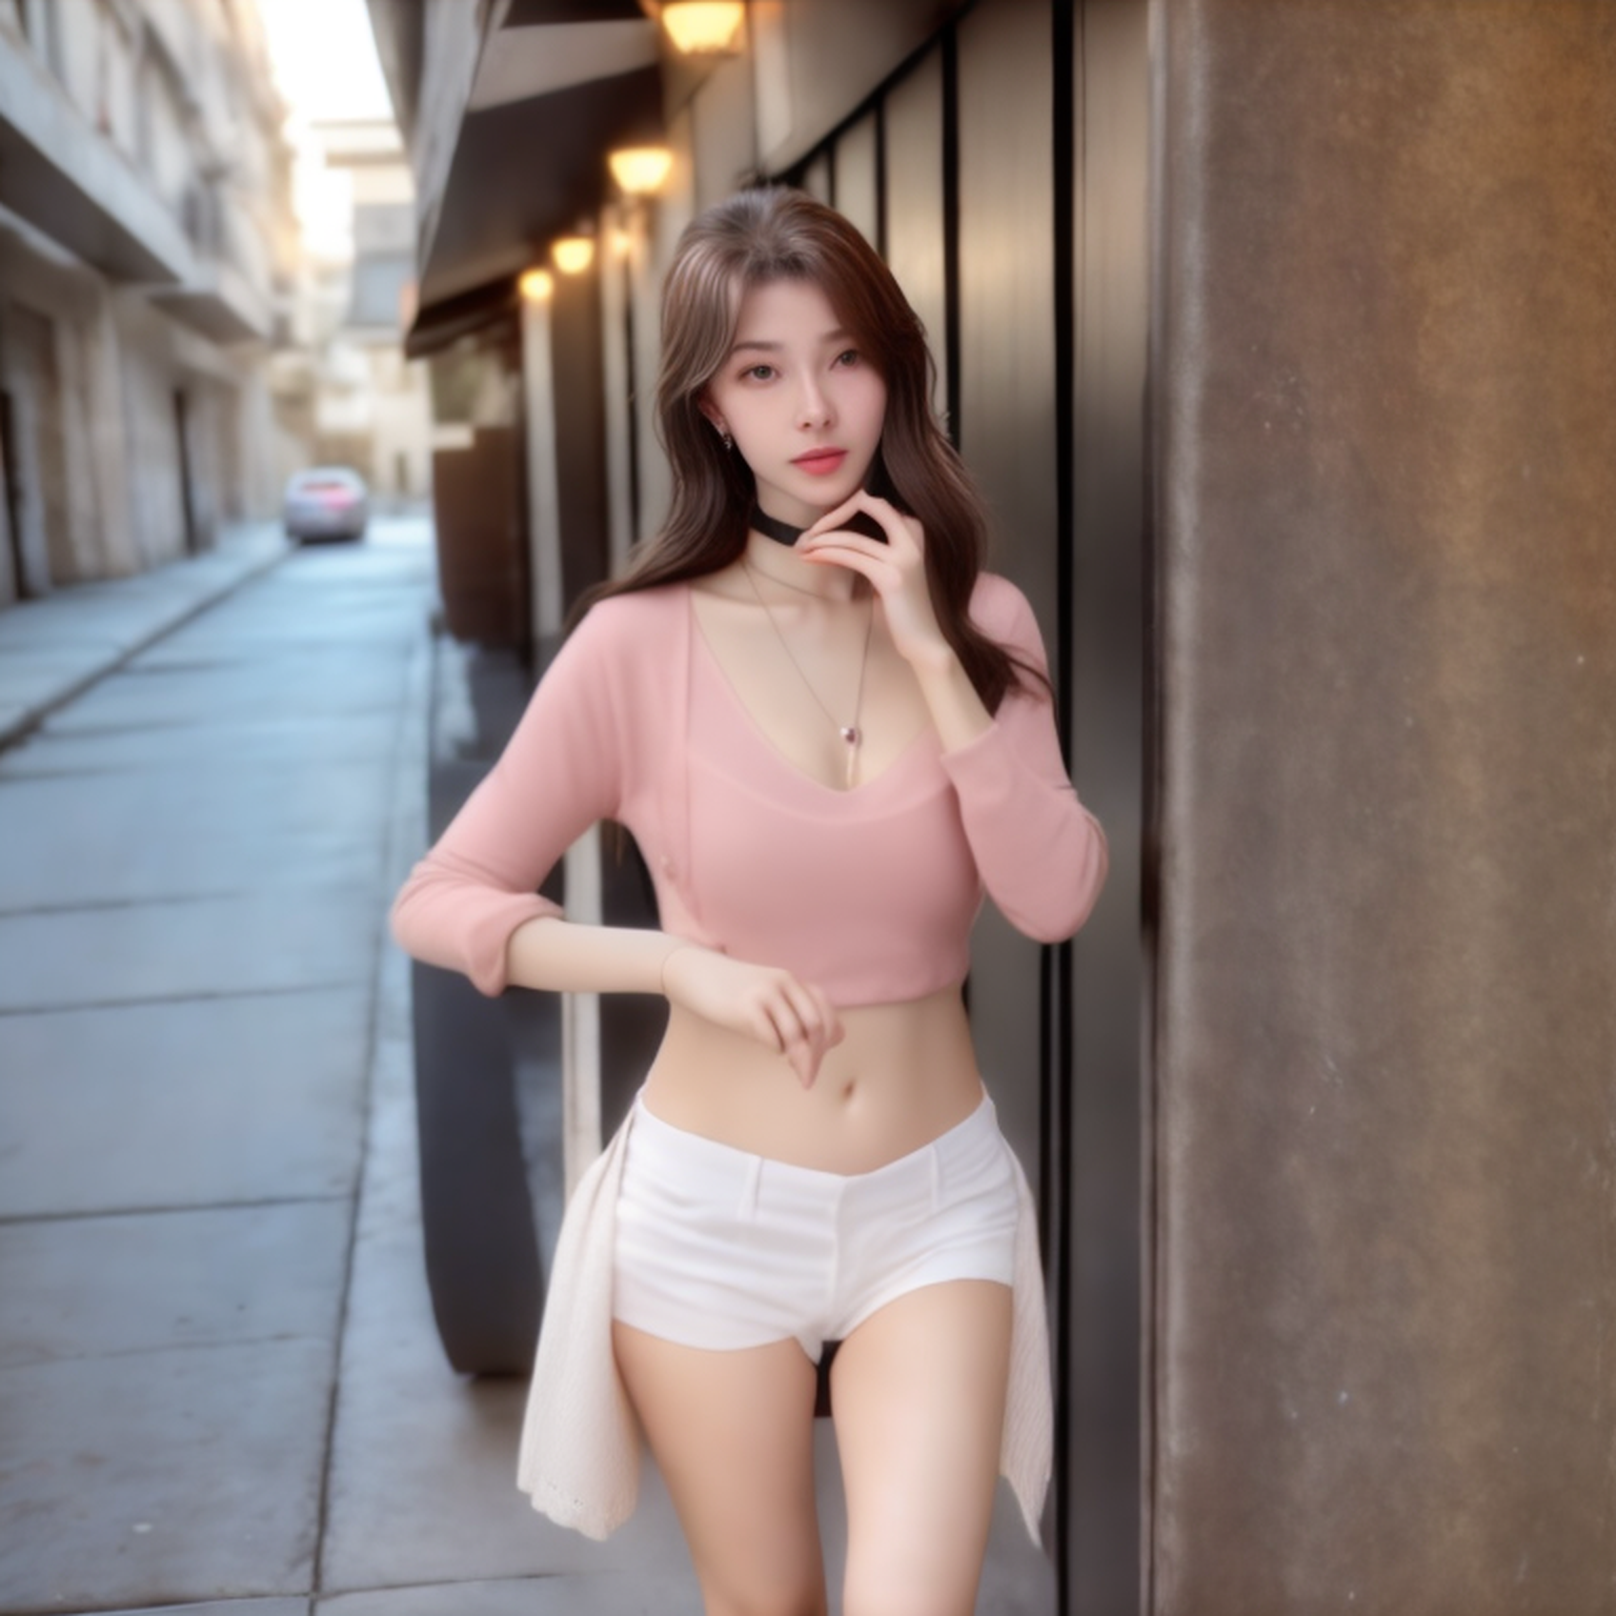

In [ ]:
image = inference_code()
image_tensor = image[0].squeeze(0)
image_tensor = image_tensor * 255.0
image_np = image_tensor.numpy().astype(numpy.uint8)
image_pil = Image.fromarray(image_np)
display(image_pil)